In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**About the Dataset:**
The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Load the Dataset**

In [ ]:
dataset= pd.read_csv('/content/updated_pollution_dataset.csv')

**EDA and Data preprocessing**

In [ ]:
dataset.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
dataset.tail()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,Moderate


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


**Data analysis**

In [ ]:
dataset.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [ ]:
dataset.shape

(5000, 10)

In [ ]:
#checking missing values
dataset.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [ ]:
dataset['Air Quality'].value_counts()

,count
Air Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


In [ ]:
col = dataset.columns.tolist().index('Air Quality')
i1 = dataset.iloc[:,col] == 'Good'
i2 = dataset.iloc[:,col] == 'Moderate'
i3 =  dataset.iloc[:,col] == 'Poor'
i4 = dataset.iloc[:,col] == 'Hazardous'

In [ ]:
dataset.iloc[i1,col] = 0
dataset.iloc[i2,col] = 1
dataset.iloc[i3,col] = 2
dataset.iloc[i4,col] = 3


In [ ]:
dataset['Air Quality'] = dataset['Air Quality'].astype('int')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


In [ ]:
sum(dataset['Air Quality'] == 0)

2000

In [ ]:
sum(dataset['Air Quality'] == 1)

1500

In [ ]:
sum(dataset['Air Quality'] == 2)

1000

In [ ]:
sum(dataset['Air Quality'] == 3)

500

In [ ]:
dataset.nunique()

,0
Temperature,362
Humidity,723
PM2.5,815
PM10,955
NO2,445
SO2,348
CO,265
Proximity_to_Industrial_Areas,179
Population_Density,683
Air Quality,4


**Data Visualization**


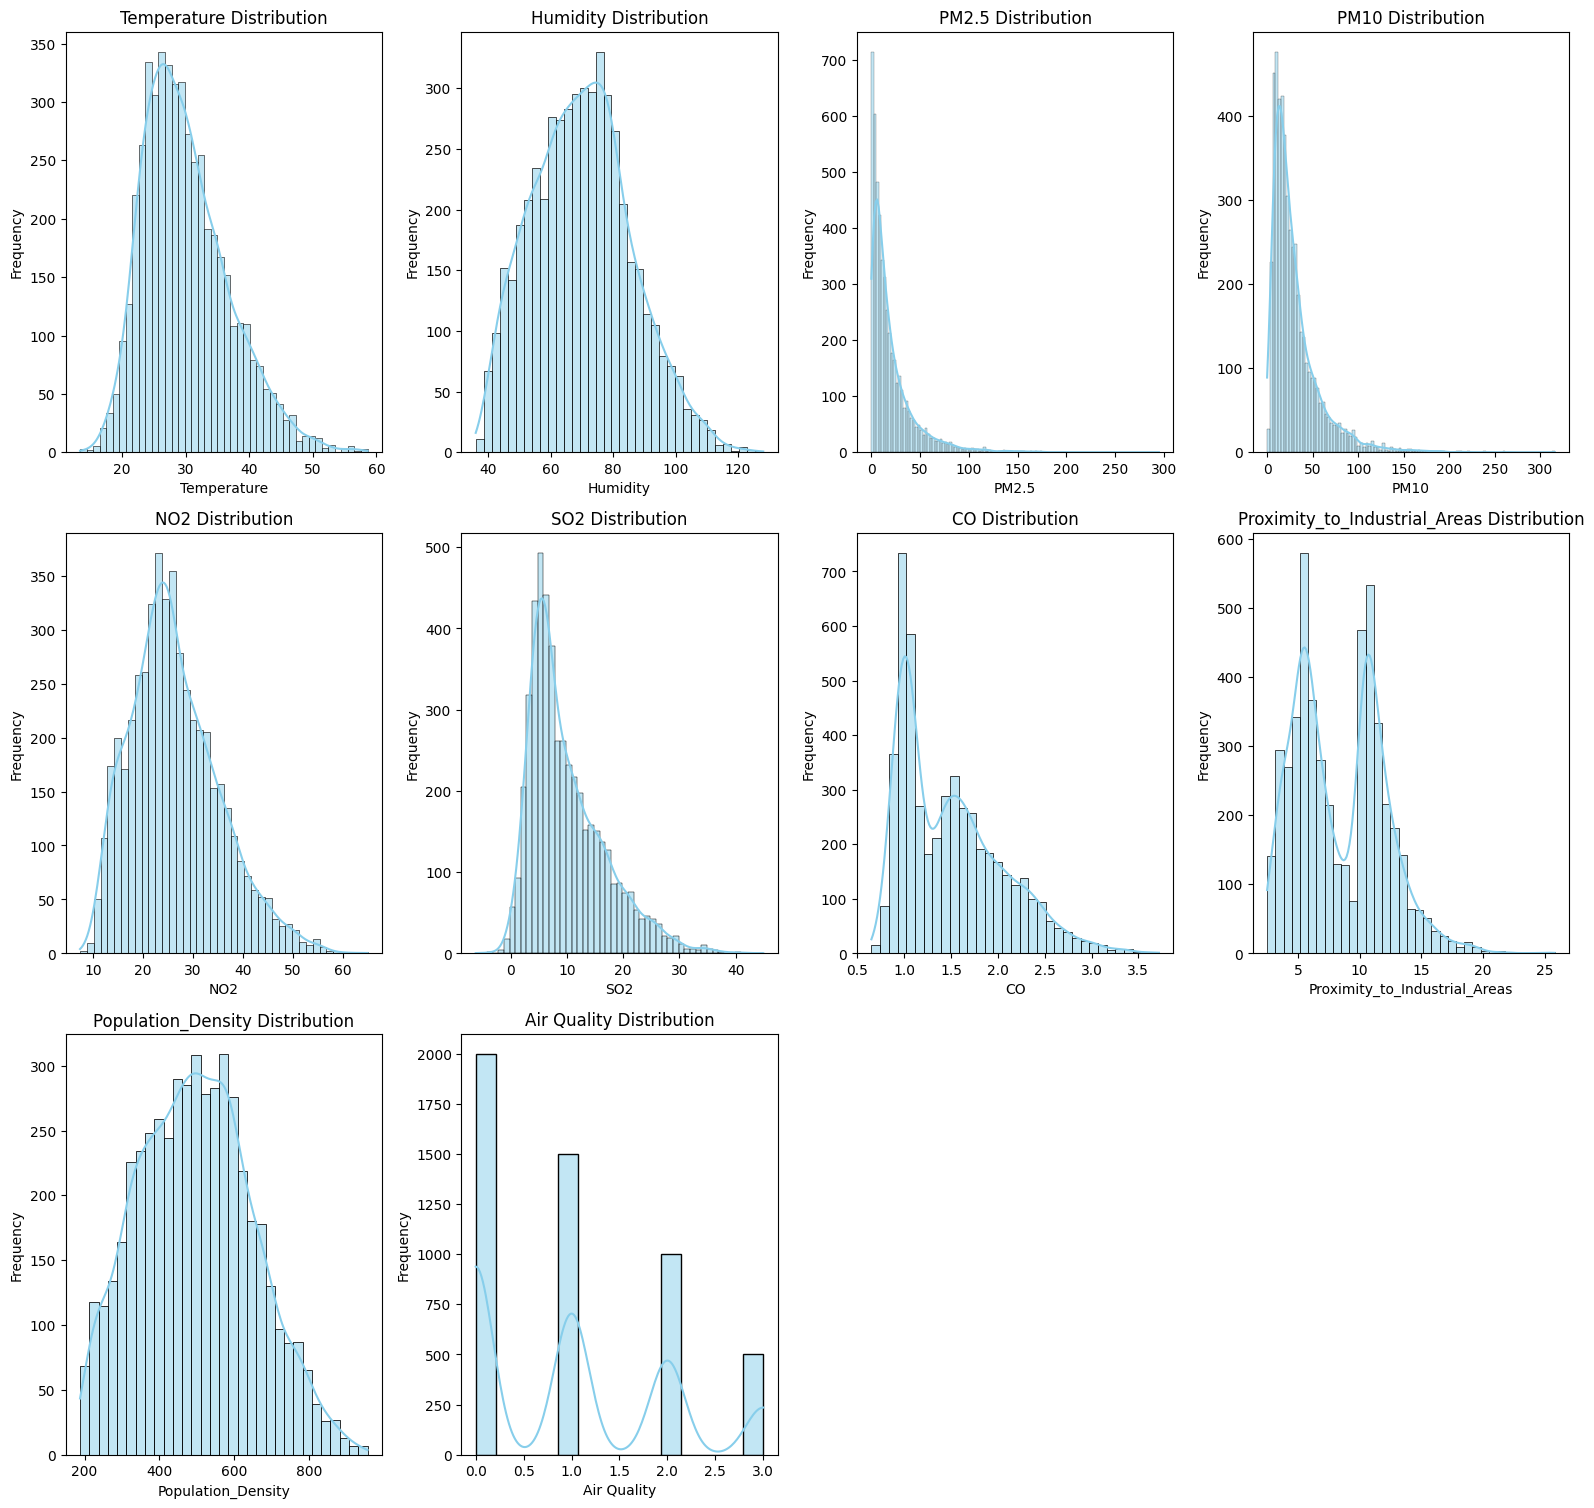

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 20))
axes = axes.flatten()

# Select columns of type float64 and int64
selected_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

for idx, column in enumerate(selected_columns):
    if idx >= len(axes):
        break

    # Plot histogram for float64 and int64 columns
    sns.histplot(data=dataset, x=column, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'{column} Distribution')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Hide unused axes
for idx in range(len(selected_columns), len(axes)):
    axes[idx].set_visible(False)

plt.show()



**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in dataset.columns:
  if dataset[column].dtype == 'float64':
    dataset[column] = le.fit_transform(dataset[column])


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Temperature                    5000 non-null   int64
 1   Humidity                       5000 non-null   int64
 2   PM2.5                          5000 non-null   int64
 3   PM10                           5000 non-null   int64
 4   NO2                            5000 non-null   int64
 5   SO2                            5000 non-null   int64
 6   CO                             5000 non-null   int64
 7   Proximity_to_Industrial_Areas  5000 non-null   int64
 8   Population_Density             5000 non-null   int64
 9   Air Quality                    5000 non-null   int64
dtypes: int64(10)
memory usage: 390.8 KB


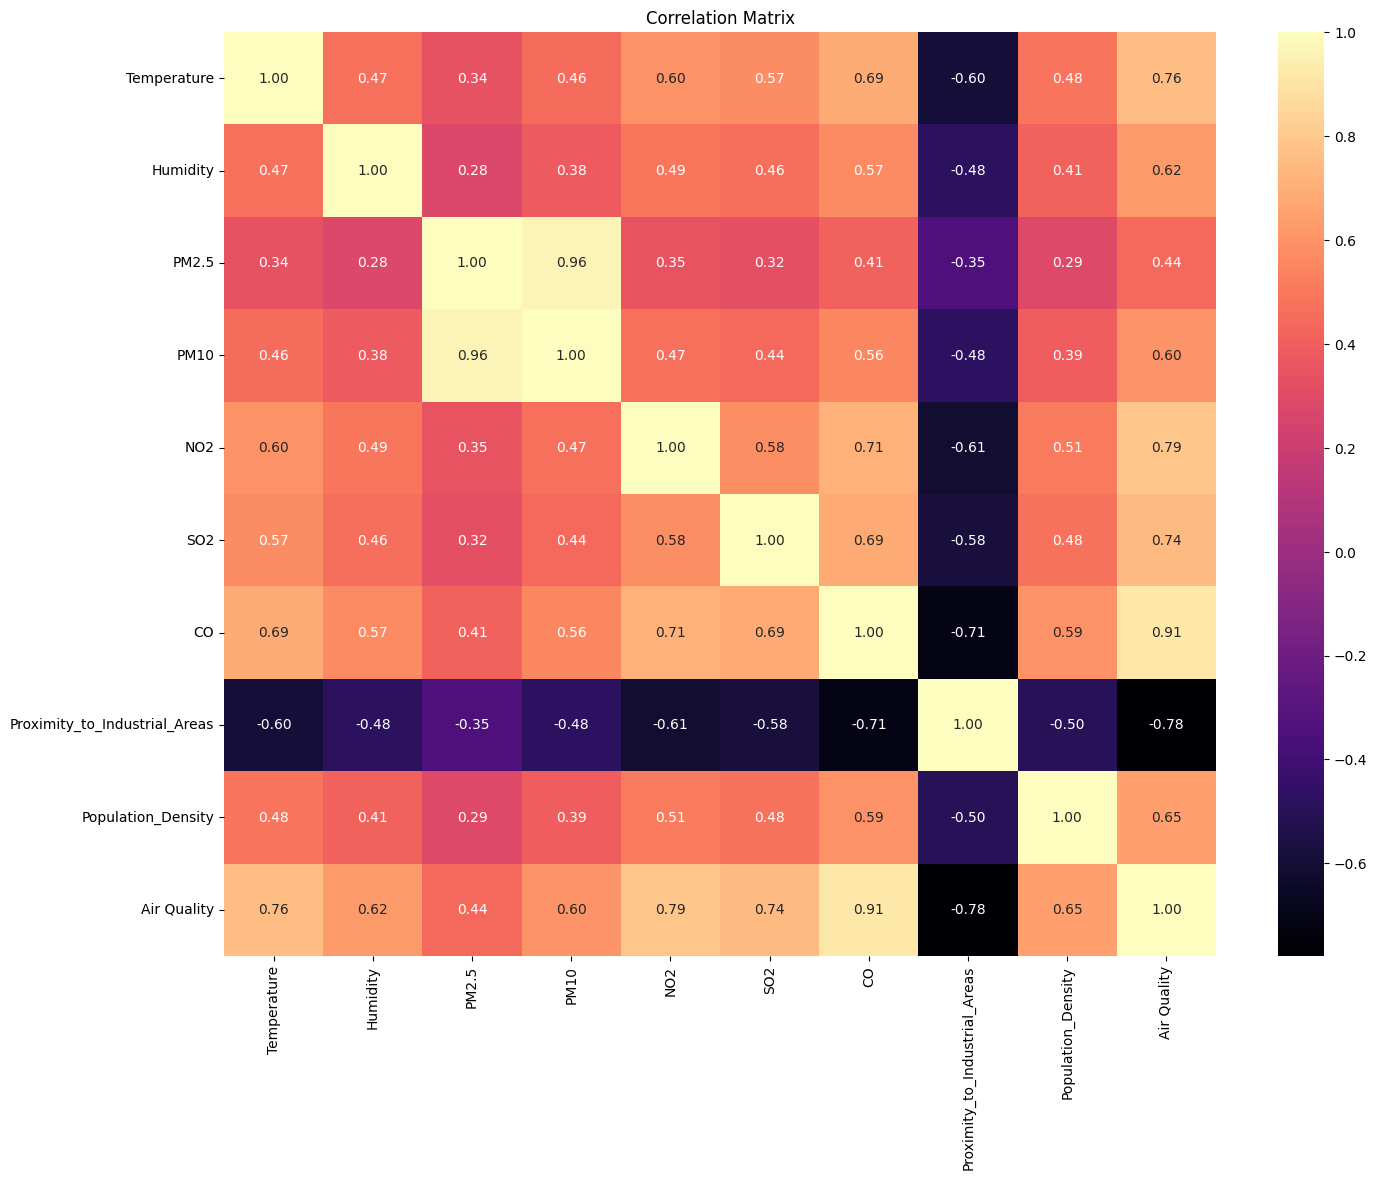

In [ ]:
corr_matrix = dataset.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**spliting the features and target**

In [ ]:
X=dataset.drop('Air Quality',axis=1)
Y=dataset['Air Quality']

In [ ]:
print(X)

      Temperature  Humidity  PM2.5  PM10  NO2  SO2   CO  \
0             140       211     52   167   95  106  103   
1             125       376     23   110  214  111   95   
2              73       367    267   326  150  140   94   
3             113        12     61    51   41   67   46   
4             107       327     69   148  125   70   32   
...           ...       ...    ...   ...  ...  ...  ...   
4995          248       361    761   889  361  271  142   
4996          123       586     69   238  159  122   85   
4997          101       402    142   209  254   92   94   
4998           95        64    214   278  143   71   20   
4999           83       399    674   801  138  119   69   

      Proximity_to_Industrial_Areas  Population_Density  
0                                38                 319  
1                                35                 611  
2                                27                 619  
3                                86                 551  
4

In [ ]:
print(Y)

0       1
1       1
2       1
3       0
4       0
       ..
4995    3
4996    1
4997    1
4998    0
4999    1
Name: Air Quality, Length: 5000, dtype: int64


**Train test split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5000, 9) (4000, 9) (1000, 9)


**Model training:**
Now we will train the model using some most used classification models. the steps are:

**importing the models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

**Logistic Regression**

In [ ]:

 #Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaling x_train
X_test_scaled = scaler.transform(X_test)  # Scaling x_test (use transform instead of fit_transform)

# Train the model with class weights balanced
model = LogisticRegression(solver='saga', max_iter=2000, C=0.1, class_weight='balanced')
model.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, solver='saga')

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Generate predictions for training data
X_train_prediction = model.predict(X_train_scaled)  # Use scaled training data

# Calculate the accuracy score for training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f"Training data Accuracy: {training_data_accuracy:.4f}")

Training data Accuracy: 0.9347


In [ ]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  93.47 %


In [ ]:

# Generate predictions for test data
X_test_prediction = model.predict(X_test_scaled)  # Use scaled test data

# Calculate the accuracy score for test data
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f"Test data Accuracy: {test_data_accuracy:.4f}")


Test data Accuracy: 0.9290


In [ ]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')



Accuracy on Test data :  92.9 %


**Precision:**Precision is the ratio of number of True Positive to the total number of Predicted Positive. It measures, out of the total predicted positive, how many are actually positive.



In [ ]:
from sklearn.metrics import precision_score

In [ ]:


# Generate predictions for training data
X_train_prediction = model.predict(X_train_scaled)

# Calculate the precision score for training data
precision_train = precision_score(Y_train, X_train_prediction, average='weighted')  # Use 'weighted' for multiclass
print(f"Training data Precision: {precision_train:.4f}")






Training data Precision: 0.9349


In [ ]:
# Generate predictions for test data
X_test_prediction = model.predict(X_test_scaled)

# Calculate the precision score for test data
precision_test = precision_score(Y_test, X_test_prediction, average='weighted')  # Use 'weighted' for multiclass
print(f"Testing data Precision: {precision_test:.4f}")

Testing data Precision: 0.9283


**Recall:**Recall is the ratio of number of True Positive to the total number of Actual Positive. It measures, out of the total actual positive, how many are predicted as True Positive.

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# Generate predictions for training data
X_test_prediction_train_prediction = model.predict(X_train_scaled)

# Calculate the recall score for training data
recall_train = recall_score(Y_train, X_train_prediction, average='weighted')  # Use 'weighted' for multiclass
print(f"Training data Recall: {recall_train:.4f}")


Training data Recall: 0.9347


In [ ]:
# Generate predictions for testing data
X_test_prediction = model.predict(X_test_scaled)

# Calculate the recall score for testing data
recall_test = recall_score(Y_test, X_test_prediction, average='weighted')  # Use 'weighted' for multiclass
print(f"Testing data Recall: {recall_test:.4f}")

Testing data Recall: 0.9290


**F1 score:**F1 Score is an important evaluation metric for binary classification that combines Precision & Recall. F1 Score is the harmonic mean of Precision & Recall.

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Generate predictions for training data
X_train_prediction = model.predict(X_train_scaled)

# Calculate the F1 score for training data
f1_train = f1_score(Y_train, X_train_prediction, average='weighted')  # Use 'weighted' for multiclass
print(f"Training data F1 Score: {f1_train:.4f}")

Training data F1 Score: 0.9345


In [ ]:
# Generate predictions for testing data
X_test_prediction = model.predict(X_test_scaled)

# Calculate the F1 score for testing data
f1_test = f1_score(Y_test, X_test_prediction, average='weighted')  # Use 'weighted' for multiclass
print(f"Testing data F1 Score: {f1_test:.4f}")

Testing data F1 Score: 0.9286


**Precision,Recall,F1 Score function**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def precision_recall_f1_score(true_labels, pred_labels, average='weighted'):

    # Calculate precision, recall, and F1 score with the specified average
    precision_value = precision_score(true_labels, pred_labels, average=average)
    recall_value = recall_score(true_labels, pred_labels, average=average)
    f1_score_value = f1_score(true_labels, pred_labels, average=average)

    # Print the results
    print('Precision =', precision_value)
    print('Recall =', recall_value)
    print('F1 Score =', f1_score_value)



In [ ]:
# Classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction, average='weighted')


Precision = 0.9349056584307495
Recall = 0.93475
F1 Score = 0.9345215466428607


In [ ]:
# Classification metrics for test data
precision_recall_f1_score(Y_test, X_test_prediction, average='weighted')


Precision = 0.9283103140245998
Recall = 0.929
F1 Score = 0.9286206173599663
